In [9]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter

(0.0, 15.0)

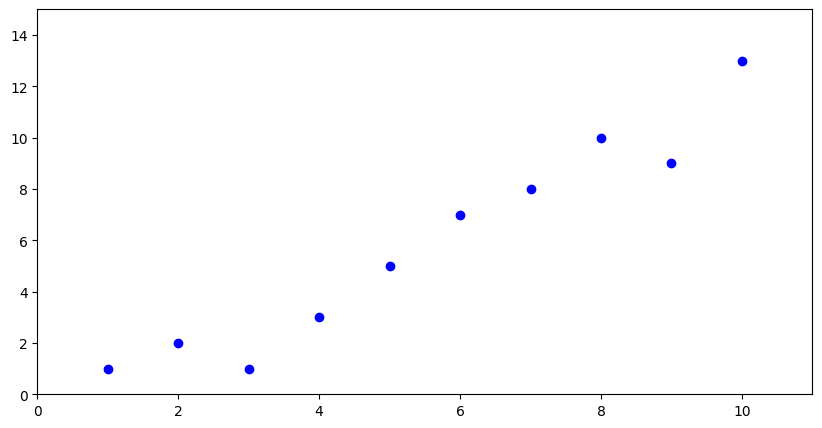

In [19]:
x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
y = [1, 2, 1, 3, 5, 7, 8, 10, 9, 13]
plt.figure(figsize=(10, 5))
plt.scatter(x, y, label='Sine Wave', color='blue')
plt.xlim(0, 11)
plt.ylim(0, 15)

### Weight Update Function for Linear Regression

The function below performs one step of gradient descent to update the weights \( w_0 \) (bias) and \( w_1 \) (slope) for a simple linear regression model:

```python
def update_weights(w0, w1, learning_rate=0.01):
    w0 -= learning_rate * (2/len(x) * np.sum([w1*x + w0 - y for x, y in zip(x, y)]))
    w1 -= learning_rate * (2/len(x) * np.sum([2*x * (w1*x + w0 - y) for x, y in zip(x, y)]))
    return w0, w1



### Gradient Descent Update Rules

Given a simple linear regression model:

\[
\hat{y}_i = w_1 x_i + w_0
\]

The weights are updated using gradient descent as follows:

\[
\begin{aligned}
w_0 &\leftarrow w_0 - \alpha \cdot \frac{2}{N} \sum_{i=1}^{N} \left( w_1 x_i + w_0 - y_i \right) \\
w_1 &\leftarrow w_1 - \alpha \cdot \frac{2}{N} \sum_{i=1}^{N} x_i \cdot \left( w_1 x_i + w_0 - y_i \right)
\end{aligned}
\]

Where:
- \( \alpha \) is the learning rate  
- \( N \) is the number of samples  
- \( y_i \) is the true label  
- \( \hat{y}_i = w_1 x_i + w_0 \) is the predicted value


In [22]:
w0=0
w1=0
def update_weights(w0, w1, learning_rate=0.01):
    w0 -= learning_rate * (2/len(x)*np.sum([w1*x+w0-y for x, y in zip(x, y)]))
    w1 -= learning_rate * (2/len(x)*np.sum([2*x*(w1*x+w0-y) for x, y in zip(x, y)]))
    return w0, w1


### Loss here is based on the mean squared error

Given a simple linear regression model:

\[
\begin{aligned}
mse =  \frac{1}{N} \sum_{i=1}^{N} \left( y_{pred} - y_{real} \right)^2
\end{aligned}
\]

  0%|          | 0/3 [00:00<?, ?it/s]

100%|██████████| 3/3 [00:00<00:00, 172.49it/s]

Epoch 1, w0: 0.1180, w1: 1.7100, MSE: 15.2928
Epoch 2, w0: 0.0455, w1: 0.8026, MSE: 5.3025
Epoch 3, w0: 0.0743, w1: 1.2863, MSE: 2.5297


(0.0, 11.0)

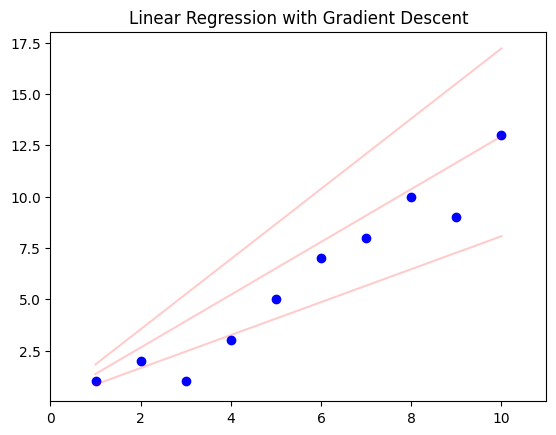

In [12]:
w0=0
w1=0
epoch = 3
mse = []
iterations = np.arange(epoch)
from tqdm import tqdm
for i in tqdm(range(epoch)):
    w0, w1 = update_weights(w0, w1)
    plt.plot(x, [w0 + w1 * xi for xi in x], color='red', alpha=0.2)
    a = w0 + w1 * np.array(x)
    b = np.array(y)
    mean_squared_error = np.mean((a - b) ** 2)
    mse.append(mean_squared_error)
    print(f'Epoch {i+1}, w0: {w0:.4f}, w1: {w1:.4f}, MSE: {mean_squared_error:.4f}')

plt.scatter(x, y, label='Sine Wave', color='blue')
plt.title('Linear Regression with Gradient Descent')
plt.xlim(0, 11)
# plt.ylim(-100, 15)

In [26]:
w0, w1 = 0, 0
w0_list = []
w1_list = []
epochs= 100

for _ in range(epochs):
    w0, w1 = update_weights(w0, w1)#, learning_rate=0.00001)
    w0_list.append(w0)
    w1_list.append(w1)

fig, ax = plt.subplots(figsize=(8, 5))
ax.scatter(x, y, label='Data', color='blue', alpha=0.6)
line, = ax.plot([], [], color='red', lw=2)
title = ax.text(0.5, 1.05, "", transform=ax.transAxes, ha="center")

def init():
    line.set_data([], [])
    title.set_text("")
    return line, title

def animate(i):
    y_pred = [w0_list[i] + w1_list[i] * xi for xi in x]
    mse_i = np.mean((np.array(y_pred) - y) ** 2)
    line.set_data(x, y_pred)
    title.set_text(f"Epoch {i+1}, w0={w0_list[i]:.2f}, w1={w1_list[i]:.2f}, MSE={mse_i:.2f}")
    return line, title


anim = FuncAnimation(fig, animate, init_func=init, frames=epochs, interval=300, blit=True)
anim.save("show-plot.gif", writer=PillowWriter(fps=4))
plt.clf()

<Figure size 800x500 with 0 Axes>

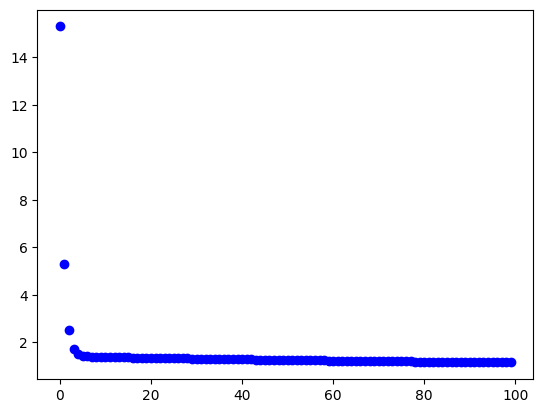

In [78]:
plt.scatter(iterations, mse, label='Sine Wave', color='blue')
# plt.xlim(0, 20)